<a href="https://colab.research.google.com/github/agahgok/Color-Detection-and-Analysis-with-OpenCV-and-KMeans/blob/main/Coding_Task_for_OpenCV_ML_AI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION
In this case study, KMeans and OpenCV algorithms were used.

It consists of 3 parts: The first part is preparing the image for color detection by preprocessing with OpenCV. The second part is detecting the 5 main colors in the photo and showing their percentages. The third part is calculating and displaying the percentages of red, white, and dark gray colors in the photo.

Before each code section, the purpose of the code is explained.

Within the code sections, explanations of the functions and processes are provided.

### Loading Libraries

Description of my first code section: In this section, the necessary libraries are installed. I will install the libraries that I will use in the following sections. The OpenCV library is used for operations on the loaded images, and the Scikit Learn library is used for the KMeans algorithm, which will be used to detect colors in the images.

In [ ]:
!pip install opencv-python-headless
!pip install scikit-learn

# Installing necessary libraries

from IPython.display import display, Image, clear_output
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter

# Importing necessary algorithms and libraries

clear_output()
print("Installation completed.")

# Clearing the outputs for a cleaner and more informative screen, and printing an information message


Installation completed.


### Image Preprocessing

In this section, the image file located at the specified path is imported into the code and made ready for processing using various OpenCV techniques.

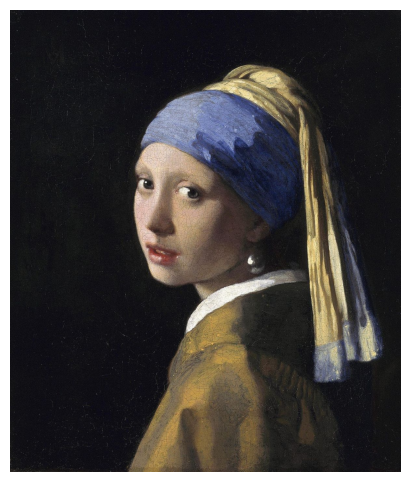

Preprocessing completed.


In [ ]:
# Load the image
image_path = '/content/test.jpg'  # File path of the image to be used
image = cv2.imread(image_path)  # Import the image from the file path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert the image from BGR to RGB format for compatibility with non-OpenCV libraries

# Display the image
plt.figure(figsize=(8, 6))  # Create a figure for displaying the image
plt.imshow(image)  # Show the image in the figure
plt.axis('off')  # Turn off the axes to show only the image
plt.show()  # Display the image

# Preprocess the image
def preprocess_image(image, width=600):
    image = cv2.resize(image, (width, int(width * image.shape[0] / image.shape[1])))  # Resize the image to a width of 600 while maintaining the aspect ratio
    return image.reshape((image.shape[0] * image.shape[1], 3))  # Reshape the resized image into a 2D array with each pixel's RGB values as a 3-element array. This is the required format for the KMeans algorithm.

preprocessed_image = preprocess_image(image)  # Run the preprocessing function
print("Preprocessing completed.")  # Inform the user

## Color Detection

### Identifying and Displaying the Top 5 Colors in the Image

In this section, the KMeans algorithm is used to identify the "k" colors present in the image.

In [ ]:
from sklearn.cluster import KMeans

def get_colors(image, k=5, n_init=10):
    clt = KMeans(n_clusters=k, n_init=n_init)  # Create a KMeans object and set the number of colors to detect
    clt.fit(image)  # Determine color clusters and run the KMeans algorithm

    return clt.cluster_centers_, clt.labels_  # Return the cluster centers (colors) and labels (indicating which color each pixel belongs to)

def get_color_percentages(labels):
    label_counts = np.bincount(labels)  # Count the number of times each label (color cluster) appears
    total_count = len(labels)  # Get the total number of pixels
    percentages = label_counts / total_count  # Calculate the percentage of each color in the total pixels
    return percentages  # Return the calculated percentages

centers, labels = get_colors(preprocessed_image, k=5)  # Call the 'get_colors' function and determine 5 main colors
percentages = get_color_percentages(labels)  # Call the 'get_color_percentages' function and calculate the percentage of each color

print("Main colors identified.")  # Inform the user that the process is complete
for center, percentage in zip(centers, percentages):  # Start a loop for each main color and percentage
    color_code = [int(c) for c in center]  # Convert the color center values to integers
    print(f"Color: {color_code}, Percentage: {percentage:.2%}")  # Print the color and percentage to the console


Main colors identified.
Color: [19, 18, 22], Percentage: 64.97%
Color: [152, 139, 122], Percentage: 7.52%
Color: [111, 95, 75], Percentage: 9.80%
Color: [52, 48, 49], Percentage: 13.43%
Color: [211, 196, 172], Percentage: 4.28%


In this section, the results are presented to the user with a pie chart.

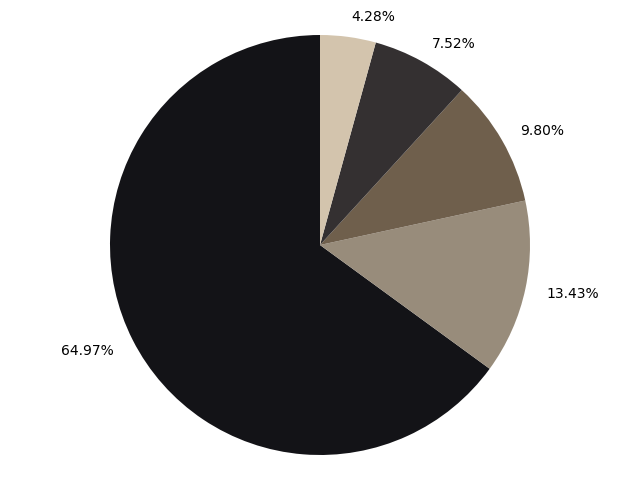

Color percentages calculated.


In [ ]:
def plot_colors(centers, labels):
    counts = Counter(labels)  # Count the number of pixels for each color
    total_count = sum(counts.values())  # Calculate the total number of pixels

    colors = centers / 255  # Normalize color values to the range [0, 1]
    colors_percent = {i: count / total_count * 100 for i, (color, count) in enumerate(zip(colors, counts.values()))}  # Calculate the percentage of each color and match colors with their percentage

    plt.figure(figsize=(8, 6))  # Set the figure size for the plot
    plt.pie(counts.values(), labels=[f'{percent:.2f}%' for percent in colors_percent.values()], colors=colors, startangle=90)
    # Draw the pie chart; labels include the percentages; colors are normalized; start angle is set to 90 degrees
    plt.axis('equal')  # Ensure the plot is circular
    plt.show()  # Display the plot

    return colors_percent  # Return the color percentages

colors_percent = plot_colors(centers, labels)  # Call the 'plot_colors' function and calculate percentages
print("Color percentages calculated.")  # Inform the user that the process is complete

### Detection of Selected Colors

In this section, the percentages of our chosen colors in the image are calculated. A limitation and masking process are applied based on the RGB codes of the desired colors.

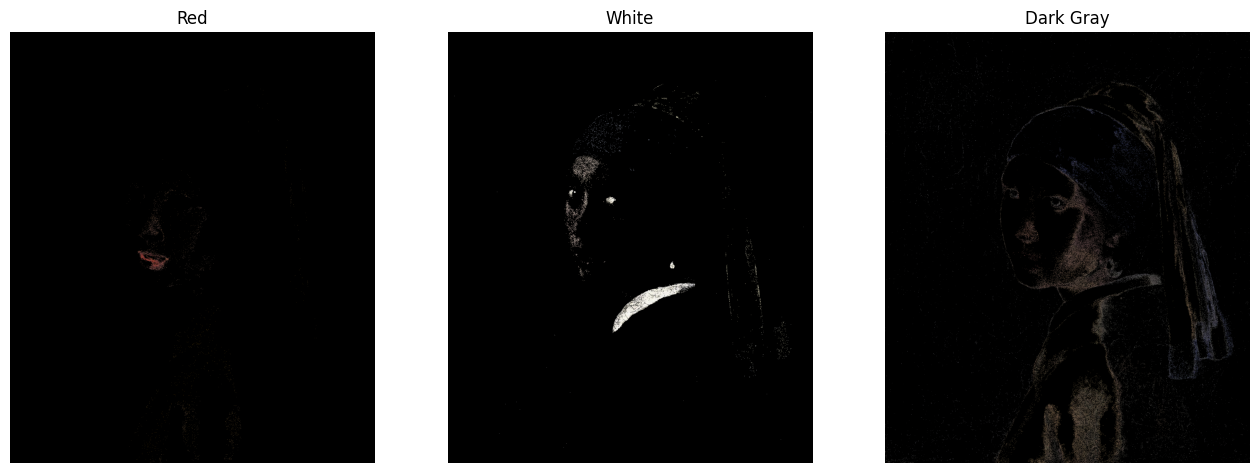

In [ ]:
# Define color ranges
def get_color_mask(image, lower_bound, upper_bound):
    mask = cv2.inRange(image, lower_bound, upper_bound)
    return mask

# Color ranges for red, white, and dark gray (RGB)
# Sensitivity can be adjusted by changing these values
red_lower = np.array([100, 0, 0])
red_upper = np.array([255, 80, 80])

white_lower = np.array([200, 200, 200])
white_upper = np.array([255, 255, 255])

dark_gray_lower = np.array([50, 50, 50])
dark_gray_upper = np.array([100, 100, 100])

# Create masks for each color range. These masks will be used for filtering.
red_mask = get_color_mask(image, red_lower, red_upper)
white_mask = get_color_mask(image, white_lower, white_upper)
dark_gray_mask = get_color_mask(image, dark_gray_lower, dark_gray_upper)

# Apply the prepared masks to the original image separately.
red_result = cv2.bitwise_and(image, image, mask=red_mask)
white_result = cv2.bitwise_and(image, image, mask=white_mask)
dark_gray_result = cv2.bitwise_and(image, image, mask=dark_gray_mask)

# Share the filtered images visually with the user. (Since this part is the same as the image preprocessing part, it is not explained line by line.)
plt.figure(figsize=(16, 12))
plt.subplot(1, 3, 1)
plt.imshow(red_result)
plt.title('Red')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(white_result)
plt.title('White')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dark_gray_result)
plt.title('Dark Gray')
plt.axis('off')

plt.show()


This code section calculates the results from the masking process and provides them as percentages.

In [ ]:
total_pixels = image.shape[0] * image.shape[1]  # Calculate the total number of pixels

# Calculate the number of pixels for each selected color
red_pixels = np.sum(red_mask > 0)
white_pixels = np.sum(white_mask > 0)
dark_gray_pixels = np.sum(dark_gray_mask > 0)

# Calculate the percentages based on the total and color pixel counts
red_percentage = (red_pixels / total_pixels) * 100
white_percentage = (white_pixels / total_pixels) * 100
dark_gray_percentage = (dark_gray_pixels / total_pixels) * 100

# Print the obtained results
print(f'Red: {red_percentage:.2f}%')
print(f'White: {white_percentage:.2f}%')
print(f'Dark Gray: {dark_gray_percentage:.2f}%')

Red: 0.27%
White: 0.82%
Dark Gray: 5.51%


Presenting the obtained results to the user with a pie chart.

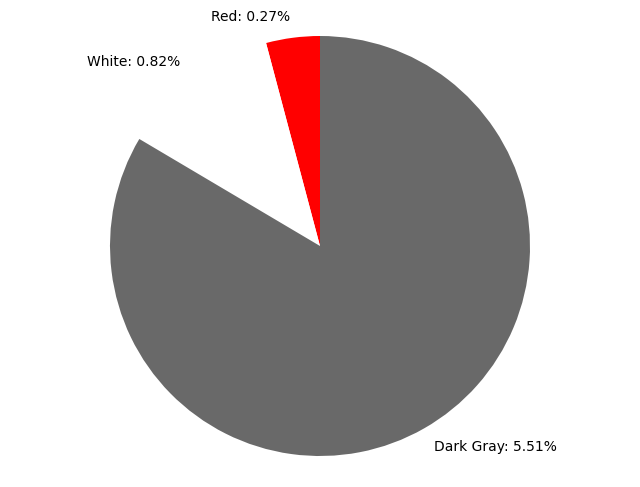

In [ ]:
colors = ['Red', 'White', 'Dark Gray']
percentages = [red_percentage, white_percentage, dark_gray_percentage]

plt.figure(figsize=(8, 6))  # Create a figure with size 8x6 inches
plt.pie(percentages, labels=[f'{color}: {percent:.2f}%' for color, percent in zip(colors, percentages)], colors=['#ff0000', '#ffffff', '#696969'], startangle=90)  # Draw a pie chart and show slices with specified colors and labels
plt.axis('equal')  # Ensure the pie chart is drawn as a circle
plt.show()  # Display the chart